<a href="https://colab.research.google.com/github/maya034/TED-TALK-VIEWS-PREDICTION/blob/main/CH_Mayank_Kumar_TED_TALK_VIEWS_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/ML2/data_ted_talks.csv")

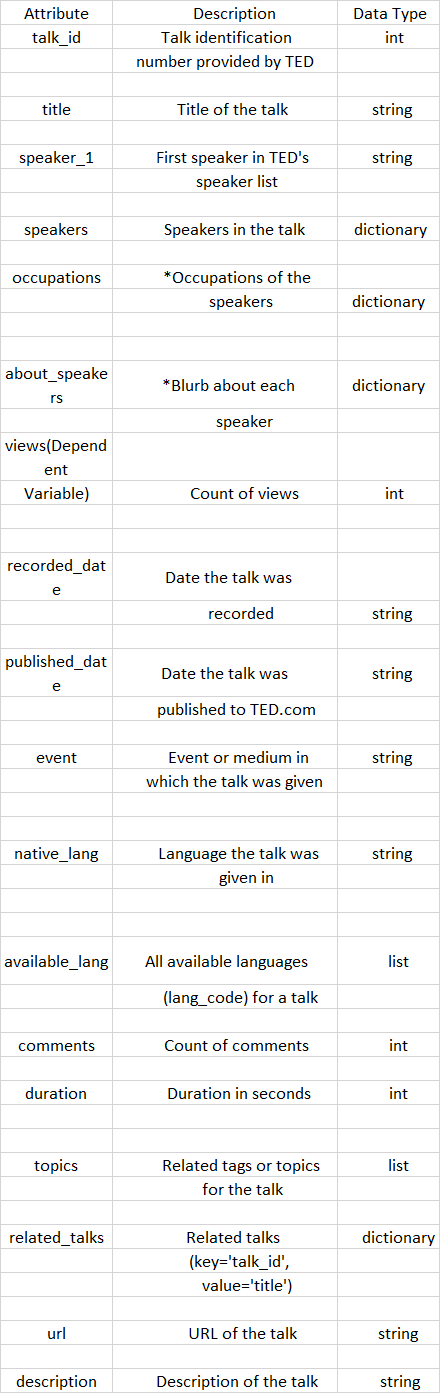

transcript       Full transcript of the talk     string


*The dictionary key maps to the speaker in ‘speakers’.

In [4]:
list(df.columns)

['talk_id',
 'title',
 'speaker_1',
 'all_speakers',
 'occupations',
 'about_speakers',
 'views',
 'recorded_date',
 'published_date',
 'event',
 'native_lang',
 'available_lang',
 'comments',
 'duration',
 'topics',
 'related_talks',
 'url',
 'description',
 'transcript']

In [5]:
df.head(6)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
5,49,Behind the design of Seattle's library,Joshua Prince-Ramus,{0: 'Joshua Prince-Ramus'},{0: ['architect']},{0: 'Joshua Prince-Ramus is best known as arch...,1208138,2006-02-23,2006-07-10,TED2006,en,"['ar', 'bg', 'en', 'es', 'fr', 'he', 'it', 'ja...",48.0,1198,"['architecture', 'collaboration', 'culture', '...",{750: 'Building a theater that remakes itself'...,https://www.ted.com/talks/joshua_prince_ramus_...,Architect Joshua Prince-Ramus takes the audien...,I'm going to present three projects in rapid f...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [7]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    return summary

In [8]:
result = resumetable(df)

Dataset Shape: (4005, 19)


In [9]:
result

,Name,dtypes,Missing,Uniques,First Value,Second Value
0,talk_id,int64,0,4005,1,92
1,title,object,0,4005,Averting the climate crisis,The best stats you've ever seen
2,speaker_1,object,0,3274,Al Gore,Hans Rosling
3,all_speakers,object,4,3306,{0: 'Al Gore'},{0: 'Hans Rosling'}
4,occupations,object,522,2049,{0: ['climate advocate']},{0: ['global health expert; data visionary']}
5,about_speakers,object,503,2977,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob..."
6,views,int64,0,3996,3523392,14501685
7,recorded_date,object,1,1334,2006-02-25,2006-02-22
8,published_date,object,0,2962,2006-06-27,2006-06-27
9,event,object,0,459,TED2006,TED2006


In [10]:
type(df['all_speakers'][0])

str

In [11]:
df.fillna({'all_speakers':"{}"},inplace=True)

In [12]:
type(df['all_speakers'][0])

str

In [13]:
df['all_speakers'][2927]

'{}'

In [14]:
df['all_speakers']=df['all_speakers'].apply(lambda x : eval(x))

In [15]:
df['all_speakers']=df['all_speakers'].apply(lambda x : list(x.values()))

In [16]:
df['count_speakers']=df['all_speakers'].apply(lambda x : len(x))

In [17]:
df['count_speakers'].value_counts()

1    3887
2      97
3      13
0       4
4       3
5       1
Name: count_speakers, dtype: int64

In [18]:
df.fillna({'occupations':"{}"},inplace=True)

In [19]:
type(df['occupations'][0])

str

In [20]:
df['occupations']=df['occupations'].apply(lambda x : eval(x))

In [21]:
df['occupations']=df['occupations'].apply(lambda x : (x.values()))

In [22]:
df['occupations']

0                           ([climate advocate])
1       ([global health expert; data visionary])
2                       ([technology columnist])
3         ([activist for environmental justice])
4                           ([author, educator])
                          ...                   
4000                         ([health activist])
4001                                          ()
4002                          ([law researcher])
4003                                          ()
4004                                          ()
Name: occupations, Length: 4005, dtype: object

In [23]:
df

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,count_speakers
0,1,Averting the climate crisis,Al Gore,[Al Gore],([climate advocate]),{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1
1,92,The best stats you've ever seen,Hans Rosling,[Hans Rosling],([global health expert; data visionary]),"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",1
2,7,Simplicity sells,David Pogue,[David Pogue],([technology columnist]),{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",1
3,53,Greening the ghetto,Majora Carter,[Majora Carter],([activist for environmental justice]),{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,1
4,66,Do schools kill creativity?,Sir Ken Robinson,[Sir Ken Robinson],"([author, educator])","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,[Nancy Lublin],([health activist]),"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B...",1
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,[Stefan C Dombrowski],(),NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo...",1
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,[Dick M. Carpenter II],([law researcher]),{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2

In [24]:
df.fillna({'about_speakers':"{}"},inplace=True)

In [25]:
df['about_speakers']=df['about_speakers'].apply(lambda x :eval(x))

In [26]:
df['about_speakers']=df['about_speakers'].apply(lambda x: list(x.values()))

In [27]:
df['native_lang'].value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
pt          1
de          1
it          1
ko          1
ar          1
pt-br       1
zh-cn       1
Name: native_lang, dtype: int64

In [28]:
df.groupby('native_lang')['views'].value_counts().sort_values(ascending=False)

native_lang  views  
es           0          4
en           0          2
             806149     2
             1446787    2
             1454261    2
                       ..
             1814661    1
             1813732    1
             1810702    1
             1809846    1
ar           1452611    1
Name: views, Length: 3997, dtype: int64

In [29]:
df['related_talks'][0]

'{243: \'New thinking on the climate crisis\', 547: \'The business logic of sustainability\', 2093: \'The state of the climate — and what we might do about it\', 54715: \'How we can turn the tide on climate\', 29968: \'The most important thing you can do to fight climate change: talk about it\', 2339: "Climate change is happening. Here\'s how we adapt"}'

In [30]:
df.describe()

,talk_id,views,comments,duration,count_speakers
count,4005.000000,4.005000e+03,3350.000000,4005.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236,1.032959
std,17447.576262,3.451226e+06,268.838922,361.775462,0.218780
min,1.000000,0.000000e+00,0.000000,60.000000,0.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000,1.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000,1.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000,1.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000,5.000000


In [31]:
df.isnull().values.any()

True

In [32]:
df['speaker_1'].isnull().value_counts()

False    4005
Name: speaker_1, dtype: int64

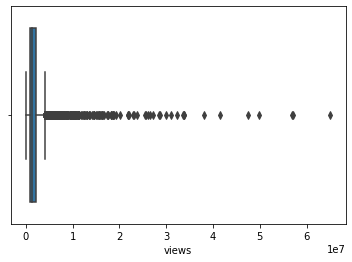

In [33]:
import seaborn as sns
sns.boxplot(df['views'])

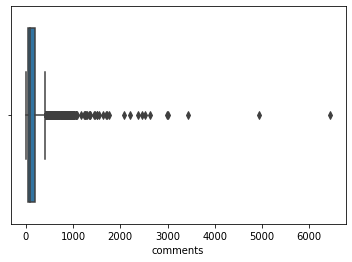

In [34]:
import seaborn as sns
sns.boxplot(df['comments'])

In [35]:
df['comments'].describe()

count    3350.000000
mean      161.997015
std       268.838922
min         0.000000
25%        38.000000
50%        89.000000
75%       188.000000
max      6449.000000
Name: comments, dtype: float64

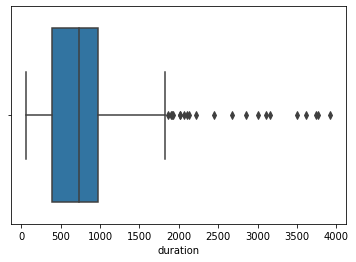

In [36]:
import seaborn as sns
sns.boxplot(df['duration'])

In [37]:
l=df['comments'].quantile(0.99)

In [38]:
df[df['comments']>l].shape

(34, 20)

In [39]:

Q1 = np.percentile(df['comments'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df['comments'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df['comments'], 75, interpolation = 'midpoint') 

In [40]:
IQR = Q3 - Q1 

In [41]:

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [42]:
outlier_comments =[]
for x in df['views']:
    if ((x> up_lim) or (x<low_lim)):
         outlier_comments.append(x)
print(' outlier in the dataset is', outlier_comments)

 outlier in the dataset is []


In [43]:

Q1 = np.percentile(df['views'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df['views'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df['views'], 75, interpolation = 'midpoint') 
  

In [44]:
IQR = Q3 - Q1 

In [45]:

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [46]:
outlier_views =[]
for x in df['views']:
    if ((x> up_lim) or (x<low_lim)):
         outlier_views.append(x)
print(' outlier in the dataset is', outlier_views)

 outlier in the dataset is [14501685, 65051954, 4636596, 4796806, 7049090, 11430399, 4032164, 8677098, 4140957, 18645468, 14372033, 4357286, 7386359, 14580918, 4091467, 6787797, 5955653, 5788514, 5857476, 4148915, 5300648, 5064090, 9418784, 9659339, 5082289, 5024994, 4144038, 15890639, 26553231, 12954031, 6928522, 6251793, 4109646, 6233365, 4744368, 13560900, 6545056, 18113717, 5764866, 5550176, 7152998, 5921682, 5340166, 4933059, 19256266, 4113823, 8792772, 11314168, 4416120, 6639270, 6811622, 30977634, 4782167, 4378764, 8039513, 4715715, 25654121, 8579496, 21858495, 7214463, 18762338, 4390444, 4102991, 25395829, 9527997, 6187754, 5664006, 6174823, 5777433, 6331825, 6152753, 8699436, 4888645, 6210513, 49730580, 5301036, 9316886, 6688030, 6466492, 5011527, 4141345, 5915370, 10143340, 47544833, 5262945, 4147612, 4719453, 5633692, 14608373, 4770370, 10947390, 4863704, 7780716, 5367231, 5709492, 7655066, 12481445, 4210667, 8666744, 8267202, 6221612, 5053890, 4416244, 28748868, 4326521, 75

In [47]:
df


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,count_speakers
0,1,Averting the climate crisis,Al Gore,[Al Gore],([climate advocate]),[Nobel Laureate Al Gore focused the world’s at...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1
1,92,The best stats you've ever seen,Hans Rosling,[Hans Rosling],([global health expert; data visionary]),"[In Hans Rosling’s hands, data sings. Global t...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",1
2,7,Simplicity sells,David Pogue,[David Pogue],([technology columnist]),[David Pogue is the personal technology column...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",1
3,53,Greening the ghetto,Majora Carter,[Majora Carter],([activist for environmental justice]),[Majora Carter redefined the field of environm...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,1
4,66,Do schools kill creativity?,Sir Ken Robinson,[Sir Ken Robinson],"([author, educator])",[Creativity expert Sir Ken Robinson challenges...,65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,[Nancy Lublin],([health activist]),"[Nancy Lublin, cofounder and CEO of Crisis Tex...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B...",1
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,[Stefan C Dombrowski],(),[],307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo...",1
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,[Dick M. Carpenter II],([law researcher]),[Dick M. Carpenter II studies cutting edge iss...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406:

In [48]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [49]:
df['title'] = df['title'].apply(remove_punctuation)

In [50]:
from nltk.corpus import stopwords

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [53]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [54]:
df['title'] = df['title'].apply(stopwords)
df['title'].head(10)

0                 averting climate crisis
1              best stats youve ever seen
2                        simplicity sells
3                         greening ghetto
4                 schools kill creativity
5          behind design seattles library
6                          letting go god
7    lets teach religion religion schools
8                            life purpose
9                    wish global day film
Name: title, dtype: object

In [55]:
from nltk.stem.wordnet import WordNetLemmatizer
wnet= WordNetLemmatizer()
import nltk
nltk.download('wordnet')
def lemmatize(text):    
    '''a function which stems each word in the given text'''
    text = [wnet.lemmatize(word) for word in text.split()]
    return " ".join(text) 
df['title'] = df['title'].apply(lemmatize)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [56]:
import nltk

nltk.download('punkt')


















[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [57]:
sentences=nltk.sent_tokenize(df['transcript'][0])

In [58]:
len(sentences)

145

In [59]:
words=nltk.word_tokenize(df['transcript'][0])

In [60]:
len(words)

2576

In [61]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords


In [62]:
sentences1=nltk.sent_tokenize(df['transcript'][1])

In [63]:
stemmer=PorterStemmer()

In [64]:
for i in range(len(sentences1)):
  words=nltk.word_tokenize(sentences1[i])
  words=[stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
  sentences1[i]=' '.join(words)   

In [65]:
sentences1

['about 10 year ago , I took task teach global develop swedish undergradu student .',
 'that spent 20 year , togeth african institut , studi hunger africa .',
 'So I sort expect know littl world .',
 'and I start , medic univers , karolinska institut , undergradu cours call global health .',
 'but get opportun , get littl nervou .',
 "I thought , student come us actual highest grade get swedish colleg system , I thought , mayb know everyth I 'm go teach .",
 'So I pretest came .',
 "and one question I learn lot one : `` which countri highest child mortal five pair ? ''",
 'and I put togeth pair countri , one twice child mortal .',
 "and mean 's much bigger , differ , uncertainti data .",
 "I wo n't put test , 's turkey , highest , poland , russia , pakistan south africa .",
 'and result swedish student .',
 'I I got confid interv , pretti narrow .',
 'and I got happi , cours — 1.8 right answer five possibl .',
 'that mean place professor intern health cours .',
 '( laughter ) but one l

In [66]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [67]:
sentences2=nltk.sent_tokenize(df['transcript'][2])
lemmatizer=WordNetLemmatizer()


In [68]:
for i in range(len(sentences2)):
  words=nltk.word_tokenize(sentences2[i])
  words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
  sentences2[i]=' '.join(words) 

In [69]:
sentences2

["( Music : `` The Sound Silence , '' Simon & Garfunkel ) Hello voice mail , old friend .",
 "( Laughter ) I 've called tech support .",
 "I ignored bos 's warning .",
 'I called Monday morning .',
 "Now 's evening , dinner first grew cold , grew mold .",
 "I 'm still hold .",
 "I 'm listening sound silence .",
 "I n't think understand .",
 'I think phone line unmanned .',
 "I punched every touch tone I told , I 've still spent 18 hour hold .",
 "It 's enough software crashed Mac , constantly hang bomb — erased ROMs !",
 'Now Mac make sound silence .',
 'In dream I fantasize wreaking vengeance guy .',
 'Say motorcycle crash .',
 'Blood come gushing gash .',
 'With fading strength , call 9-1-1 pray trained MD .',
 'But get .',
 '( Laughter ) And listen sound silence .',
 '( Music ) ( Applause ) Thank .',
 "Good evening welcome : `` Spot TED Presenter Who Used Be Broadway Accompanist . ''",
 "( Laughter ) When I offered Times column six year ago , deal like : 'll sent coolest , hottest ,

In [70]:
df

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,count_speakers
0,1,averting climate crisis,Al Gore,[Al Gore],([climate advocate]),[Nobel Laureate Al Gore focused the world’s at...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1
1,92,best stats youve ever seen,Hans Rosling,[Hans Rosling],([global health expert; data visionary]),"[In Hans Rosling’s hands, data sings. Global t...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",1
2,7,simplicity sell,David Pogue,[David Pogue],([technology columnist]),[David Pogue is the personal technology column...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",1
3,53,greening ghetto,Majora Carter,[Majora Carter],([activist for environmental justice]),[Majora Carter redefined the field of environm...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,1
4,66,school kill creativity,Sir Ken Robinson,[Sir Ken Robinson],"([author, educator])",[Creativity expert Sir Ken Robinson challenges...,65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,crisis support world one text away,Nancy Lublin,[Nancy Lublin],([health activist]),"[Nancy Lublin, cofounder and CEO of Crisis Tex...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B...",1
4001,62782,dark history iq test,Stefan C Dombrowski,[Stefan C Dombrowski],(),[],307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo...",1
4002,62263,policing profit undermines right,Dick M. Carpenter II,[Dick M. Carpenter II],([law researcher]),[Dick M. Carpenter II studies cutting edge iss...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.t

In [71]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [72]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [164]:
df['description'] = df['description'].apply(remove_punctuation)
df.head(10)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,count_speakers
0,1,averting climate crisis,Al Gore,[Al Gore],([climate advocate]),[Nobel Laureate Al Gore focused the world’s at...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1
1,92,best stats youve ever seen,Hans Rosling,[Hans Rosling],([global health expert; data visionary]),"[In Hans Rosling’s hands, data sings. Global t...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,Youve never seen data presented like this With...,"About 10 years ago, I took on the task to teac...",1
2,7,simplicity sell,David Pogue,[David Pogue],([technology columnist]),[David Pogue is the personal technology column...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",1
3,53,greening ghetto,Majora Carter,[Majora Carter],([activist for environmental justice]),[Majora Carter redefined the field of environm...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,In an emotionally charged talk MacArthurwinnin...,If you're here today — and I'm very happy that...,1
4,66,school kill creativity,Sir Ken Robinson,[Sir Ken Robinson],"([author, educator])",[Creativity expert Sir Ken Robinson challenges...,65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,1
5,49,behind design seattle library,Joshua Prince-Ramus,[Joshua Prince-Ramus],([architect]),[Joshua Prince-Ramus is best known as architec...,1208138,2006-02-23,2006-07-10,TED2006,en,"['ar', 'bg', 'en', 'es', 'fr', 'he', 'it', 'ja...",48.0,1198,"['architecture', 'collaboration', 'culture', '...",{750: 'Building a theater that remakes itself'...,https://www.ted.com/talks/joshua_prince_ramus_...,Architect Joshua PrinceRamus takes the audienc...,I'm going to present three projects in rapid f...,1
6,86,letting go god,Julia Sweeney,[Julia Sweeney],"([actor, comedian, playwright])",[Julia Sweeney creates comedic works that tack...,4636596,2006-02-24,2006-07-10,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",980.0,992,"['Christianity', 'God', 'atheism', 'comedy', '...","{22: 'Why people believe weird things', 94: ""L...",https://www.ted.com/talks/julia_sweeney_lettin...,When two young Mormon missionaries knock on Ju...,"On September 10, the morning of my seventh bir...",1
7,94,let teach religion religion school,Dan Dennett,[Dan Dennett],"([philosopher, cognitive scientist])",[Dan Dennett thinks that human consciousness a...,3781244,2006-02-02,2006-07-18,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",919.0,1485,"['God', 'atheism', 'brain', 'cognitive science...","{7

In [165]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [166]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [167]:
def stopwords(trans):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    trans = [word.lower() for word in trans.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(trans)

In [79]:
df['transcript'] = df['transcript'].apply(stopwords)
df.head(10)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,count_speakers
0,1,averting climate crisis,Al Gore,[Al Gore],([climate advocate]),[Nobel Laureate Al Gore focused the world’s at...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,thank much chris truly great honor opportunity...,1
1,92,best stats youve ever seen,Hans Rosling,[Hans Rosling],([global health expert; data visionary]),"[In Hans Rosling’s hands, data sings. Global t...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,10 years ago took task teach global developmen...,1
2,7,simplicity sell,David Pogue,[David Pogue],([technology columnist]),[David Pogue is the personal technology column...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,music sound silence simon garfunkel hello voic...,1
3,53,greening ghetto,Majora Carter,[Majora Carter],([activist for environmental justice]),[Majora Carter redefined the field of environm...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",youre today — im happy — youve heard sustainab...,1
4,66,school kill creativity,Sir Ken Robinson,[Sir Ken Robinson],"([author, educator])",[Creativity expert Sir Ken Robinson challenges...,65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,good morning audience good great hasnt ive blo...,1
5,49,behind design seattle library,Joshua Prince-Ramus,[Joshua Prince-Ramus],([architect]),[Joshua Prince-Ramus is best known as architec...,1208138,2006-02-23,2006-07-10,TED2006,en,"['ar', 'bg', 'en', 'es', 'fr', 'he', 'it', 'ja...",48.0,1198,"['architecture', 'collaboration', 'culture', '...",{750: 'Building a theater that remakes itself'...,https://www.ted.com/talks/joshua_prince_ramus_...,Architect Joshua Prince-Ramus takes the audien...,im going present three projects rapid fire don...,1
6,86,letting go god,Julia Sweeney,[Julia Sweeney],"([actor, comedian, playwright])",[Julia Sweeney creates comedic works that tack...,4636596,2006-02-24,2006-07-10,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",980.0,992,"['Christianity', 'God', 'atheism', 'comedy', '...","{22: 'Why people believe weird things', 94: ""L...",https://www.ted.com/talks/julia_sweeney_lettin...,When two young Mormon missionaries knock on Ju...,september 10 morning seventh birthday came dow...,1
7,94,let teach religion religion school,Dan Dennett,[Dan Dennett],"([philosopher, cognitive scientist])",[Dan Dennett thinks that human consciousness a...,3781244,2006-02-02,2006-07-18,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",919.0,1485,"['God', 'atheism', 'brain', 'cognitive science...","{71: 'A li

In [168]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [169]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

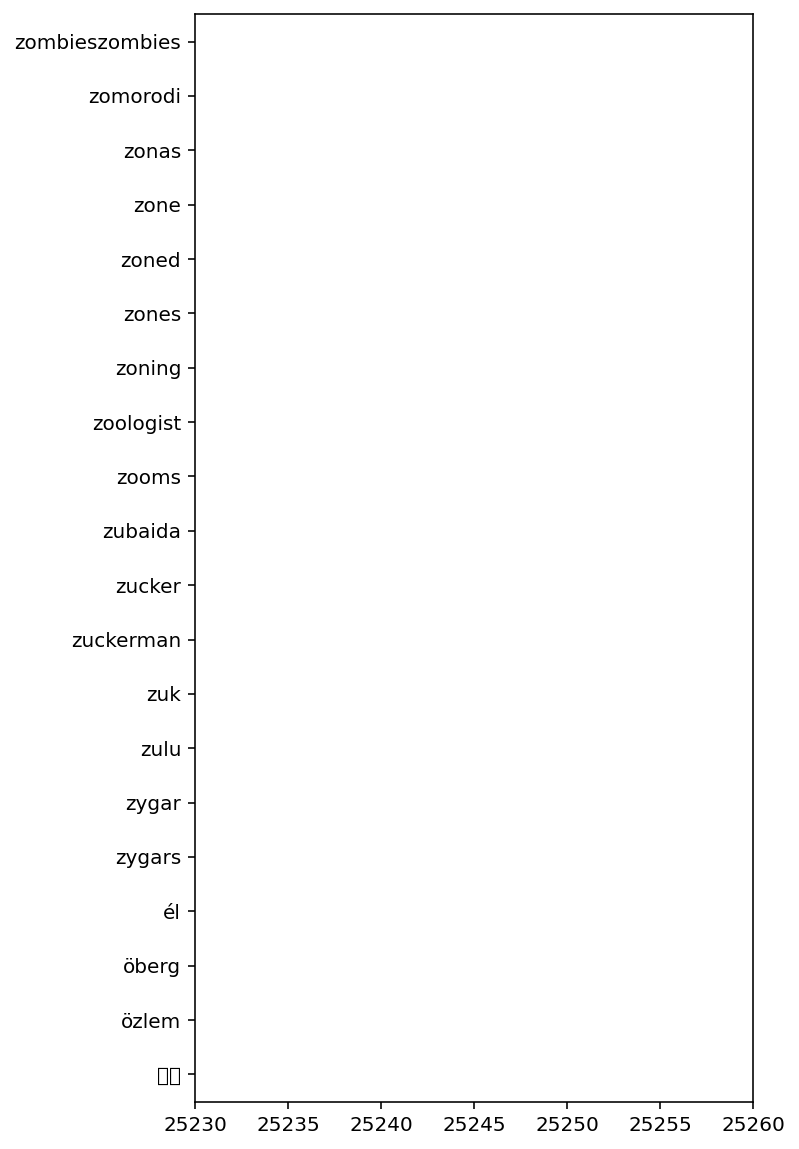

In [170]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))

In [83]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [86]:
df['transcript'] = df['transcript'].apply(stemming)
df.head(10)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,count_speakers
0,1,averting climate crisis,Al Gore,[Al Gore],([climate advocate]),[Nobel Laureate Al Gore focused the world’s at...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,thank much chris truli great honor opportun co...,1
1,92,best stats youve ever seen,Hans Rosling,[Hans Rosling],([global health expert; data visionary]),"[In Hans Rosling’s hands, data sings. Global t...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,10 year ago took task teach global develop swe...,1
2,7,simplicity sell,David Pogue,[David Pogue],([technology columnist]),[David Pogue is the personal technology column...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,music sound silenc simon garfunkel hello voic ...,1
3,53,greening ghetto,Majora Carter,[Majora Carter],([activist for environmental justice]),[Majora Carter redefined the field of environm...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",your today — im happi — youv heard sustain dev...,1
4,66,school kill creativity,Sir Ken Robinson,[Sir Ken Robinson],"([author, educator])",[Creativity expert Sir Ken Robinson challenges...,65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,good morn audienc good great hasnt ive blown a...,1
5,49,behind design seattle library,Joshua Prince-Ramus,[Joshua Prince-Ramus],([architect]),[Joshua Prince-Ramus is best known as architec...,1208138,2006-02-23,2006-07-10,TED2006,en,"['ar', 'bg', 'en', 'es', 'fr', 'he', 'it', 'ja...",48.0,1198,"['architecture', 'collaboration', 'culture', '...",{750: 'Building a theater that remakes itself'...,https://www.ted.com/talks/joshua_prince_ramus_...,Architect Joshua Prince-Ramus takes the audien...,im go present three project rapid fire dont mu...,1
6,86,letting go god,Julia Sweeney,[Julia Sweeney],"([actor, comedian, playwright])",[Julia Sweeney creates comedic works that tack...,4636596,2006-02-24,2006-07-10,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",980.0,992,"['Christianity', 'God', 'atheism', 'comedy', '...","{22: 'Why people believe weird things', 94: ""L...",https://www.ted.com/talks/julia_sweeney_lettin...,When two young Mormon missionaries knock on Ju...,septemb 10 morn seventh birthday came downstai...,1
7,94,let teach religion religion school,Dan Dennett,[Dan Dennett],"([philosopher, cognitive scientist])",[Dan Dennett thinks that human consciousness a...,3781244,2006-02-02,2006-07-18,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",919.0,1485,"['God', 'atheism', 'brain', 'cognitive science...","{71: 'A li

In [87]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")

# fit the vectorizer using the text data
tfid_vectorizer.fit(df['transcript'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

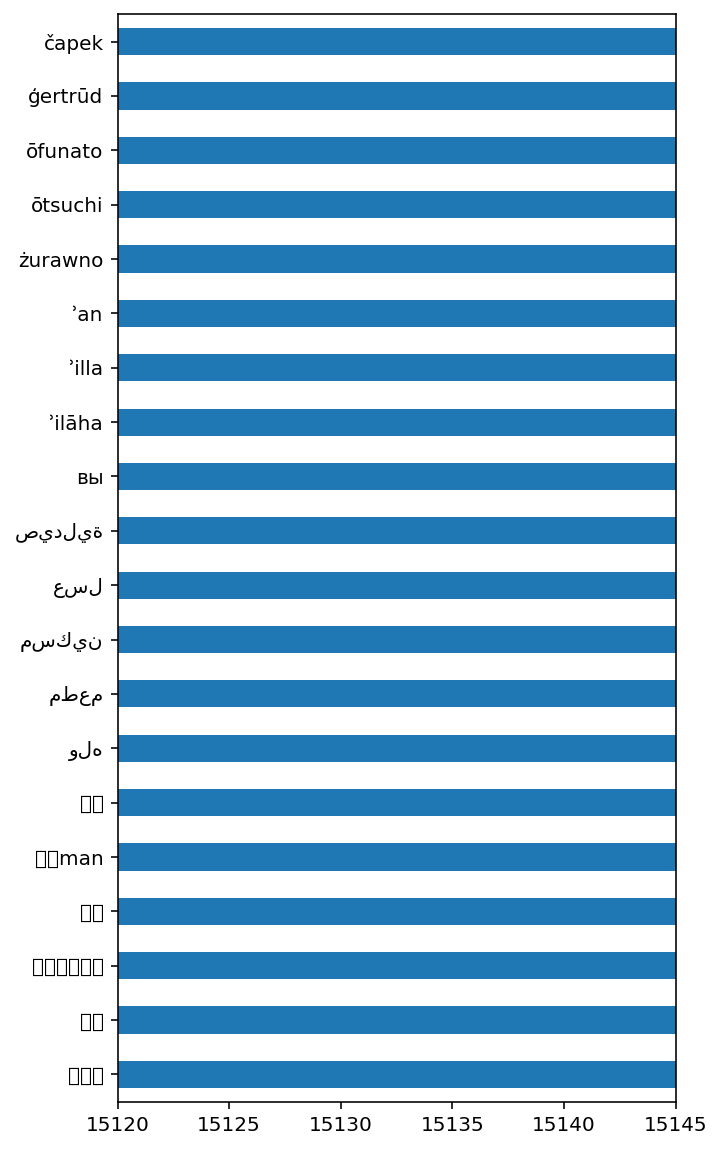

In [88]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (15120, 15145))

In [89]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(df['transcript'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [90]:
# store the tf-idf array into pandas dataframe
df = pd.DataFrame(array)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,55779,55780,55781,55782,55783,55784,55785,55786,55787,55788,55789,55790,55791,55792,55793,55794,55795,55796,55797,55798,55799,55800,55801,55802,55803,55804,55805,55806,55807,55808,55809,55810,55811,55812,55813,55814,55815,55816,55817,55818
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
